# Red Wine quality

## Постановка задачи 
По базе данных, содерщей химический состав красного вина, необходимо определить оценку качества вина по 10 балльной шкале

## Описание признаков
 - `fixed acidity`
 - `volatile acidity`
 - `citric acid`
 - `residual sugar`
 - `chlorides`
 - `free sulfur dioxide`
 - `total sulfur dioxide`
 - `density`
 - `pH`
 - `sulphates`
 - `alcohol`
 - `quality` (score between 0 and 10)

## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv', sep = ';', engine = 'python')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
print(data.shape)
print(data.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Посмотрим общую характеристику текущего набора

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Визуализация данных, вычисление основных характеристик

In [7]:
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


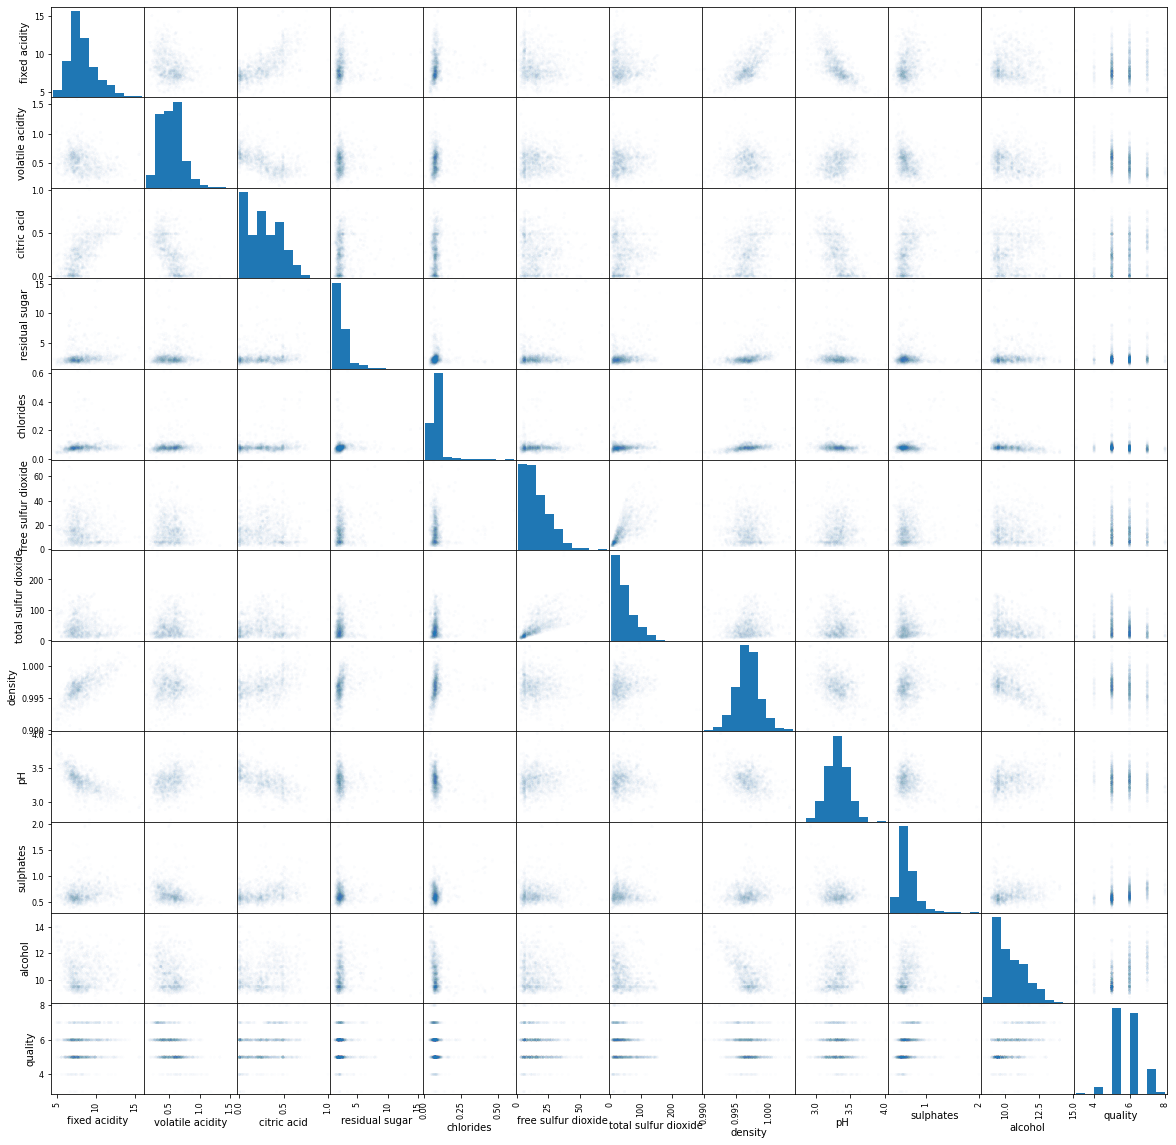

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (20, 20))
pass

Классы не сбалансированы

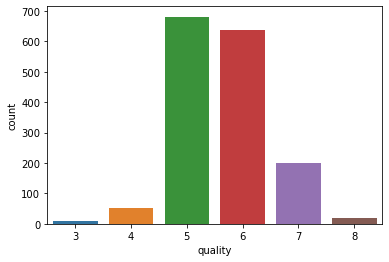

In [10]:
sns.countplot(x="quality", data=data)
pass

Выведем матрицу корреляции

In [110]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


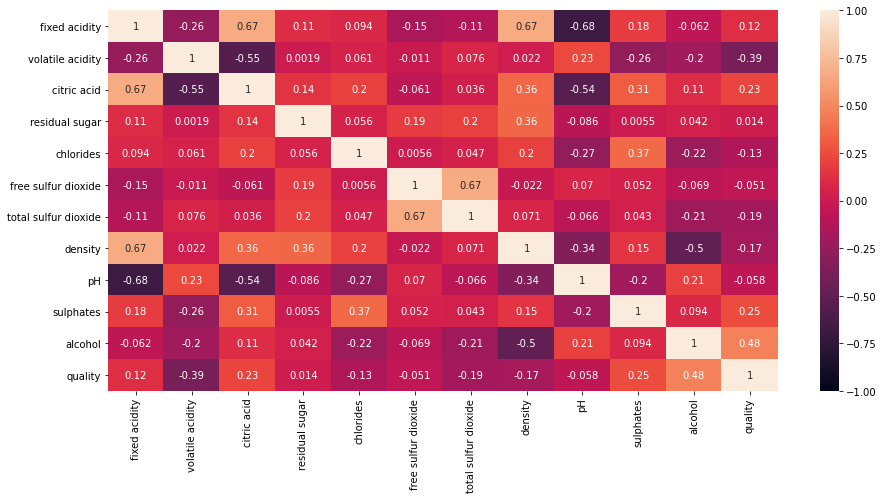

In [11]:
corr_mat = data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot=True)
pass

Теперь можно посмотреть на диаграмму рассеивания

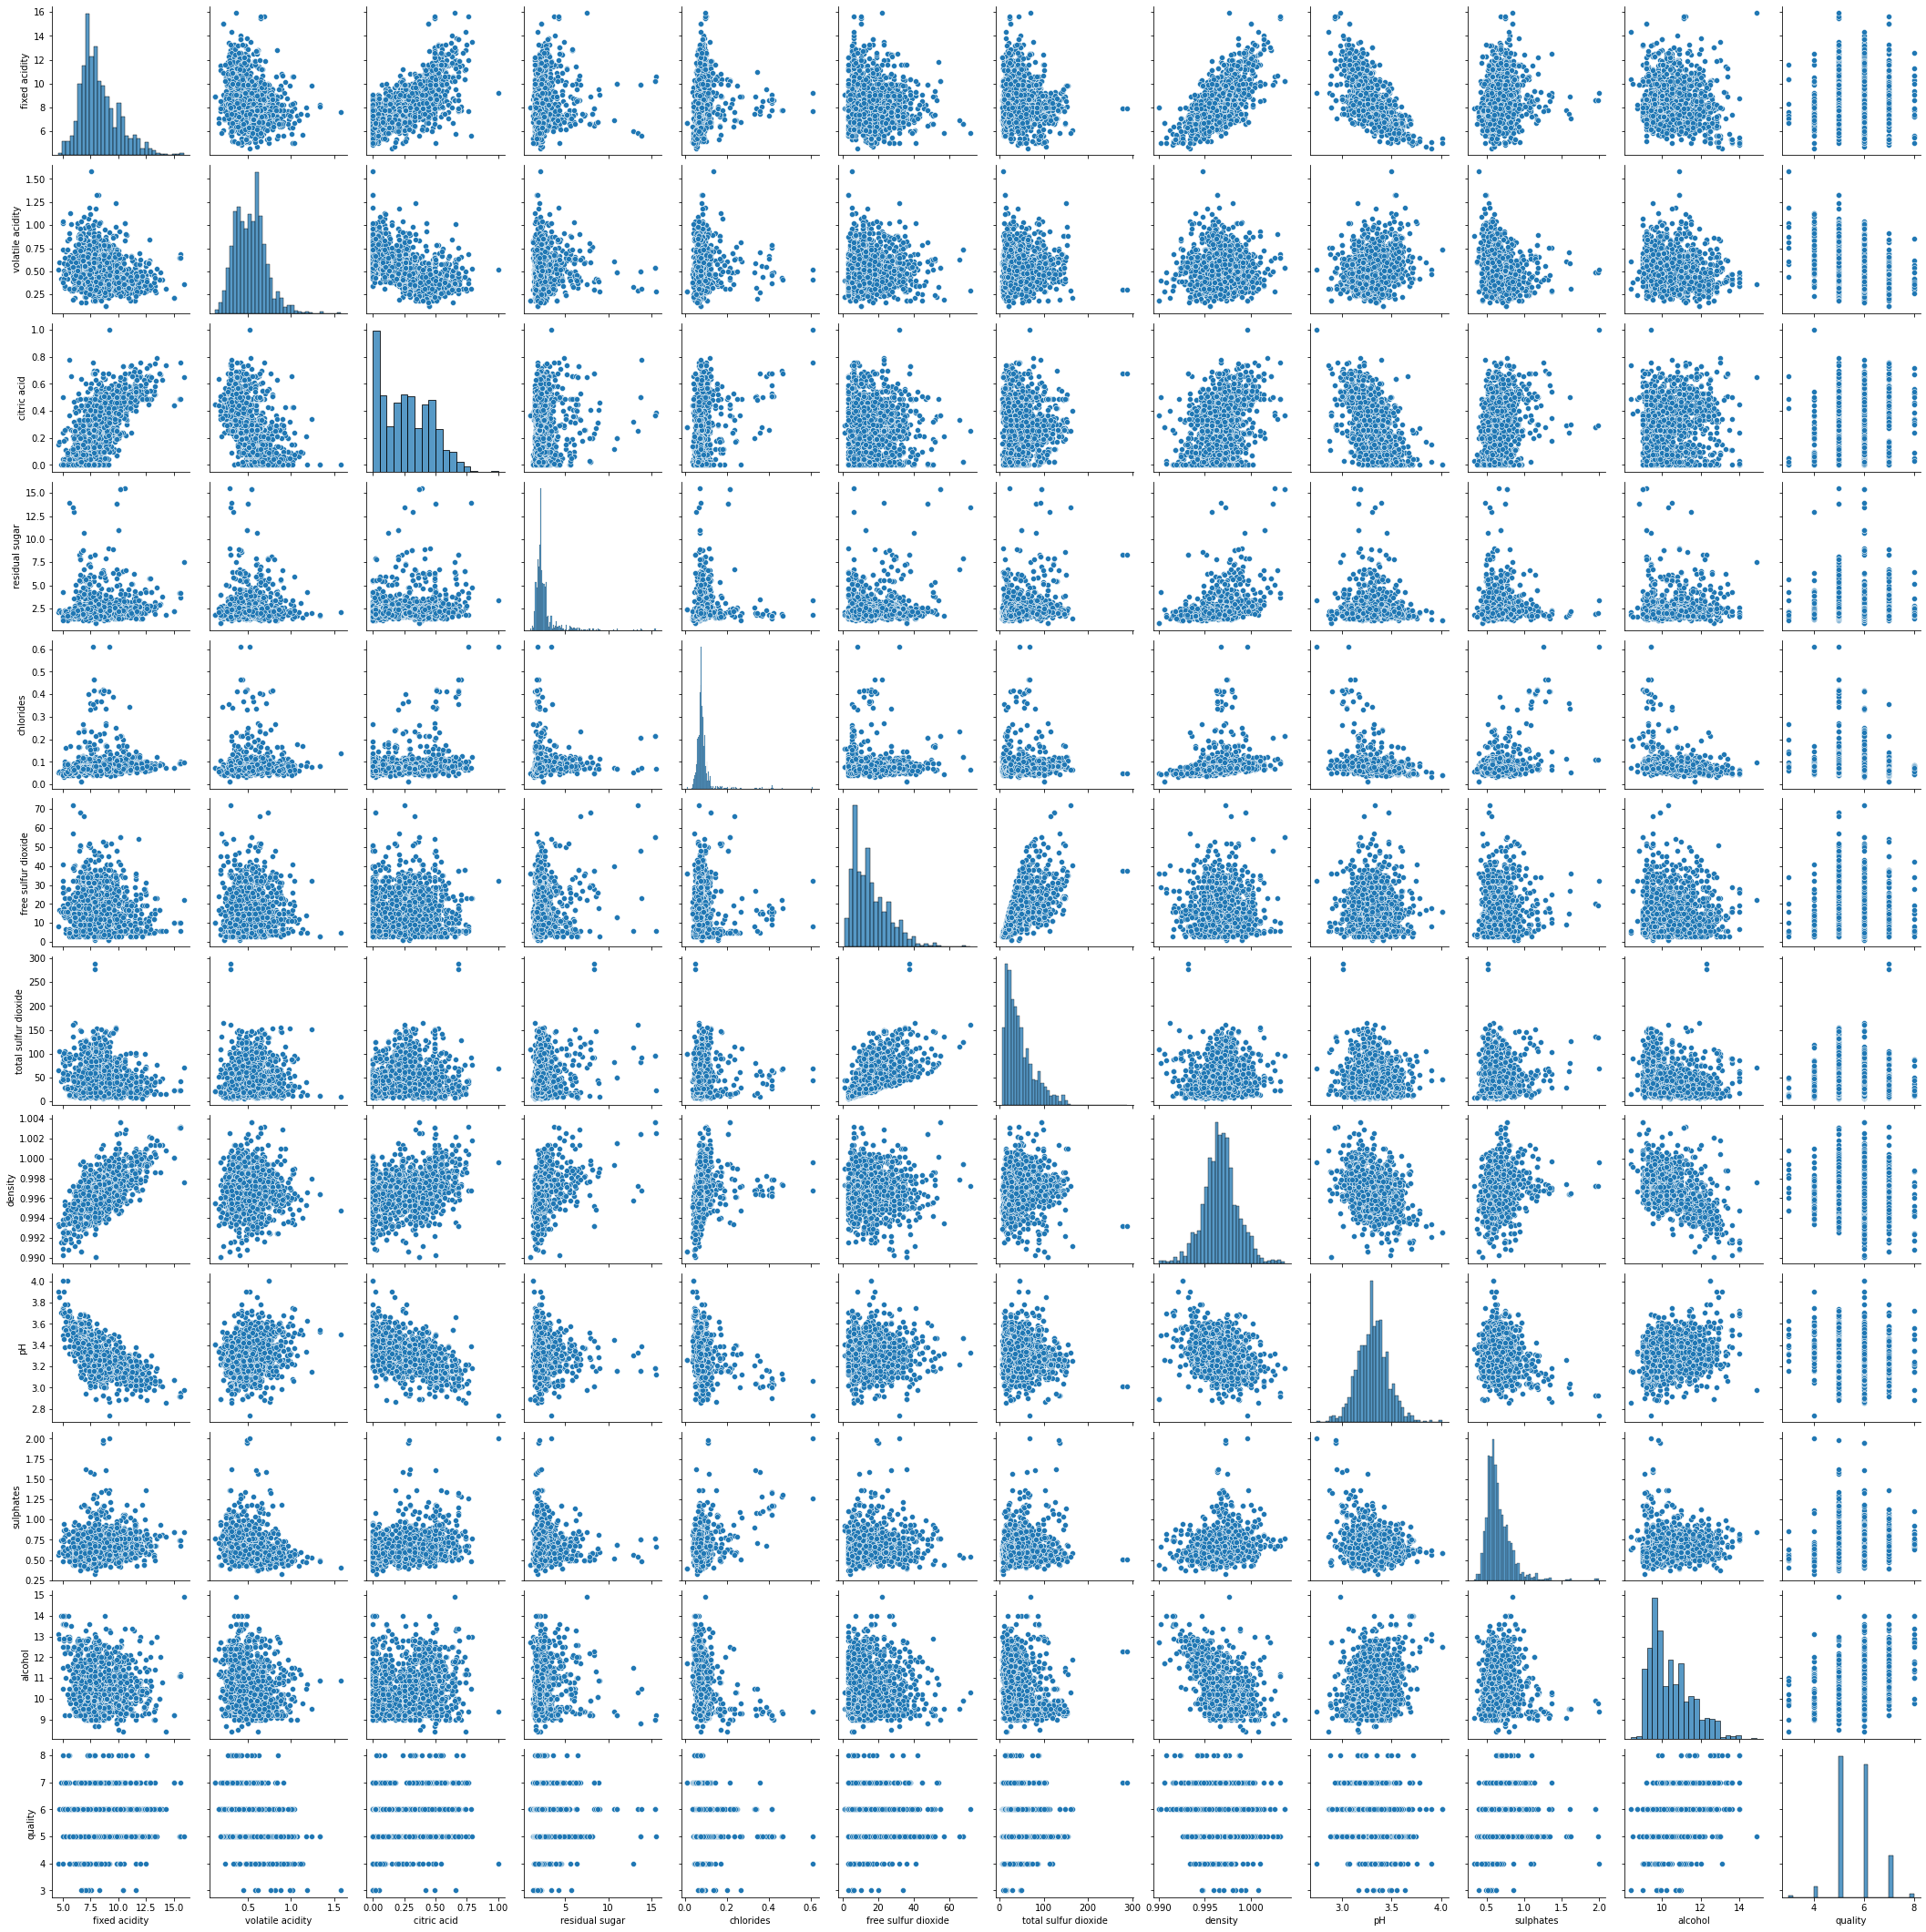

In [12]:
sns.pairplot(data)
pass

Посмотрим зависимость алкоголя от качества вина

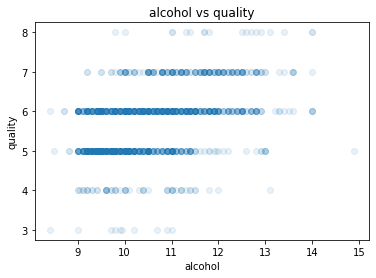

In [111]:
plt.plot(data['alcohol'], data['quality'], 'o', alpha = 0.1)
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('alcohol vs quality')
pass

In [112]:
data['alcohol'] < 10

0        True
1        True
2        True
3        True
4        True
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: alcohol, Length: 1599, dtype: bool

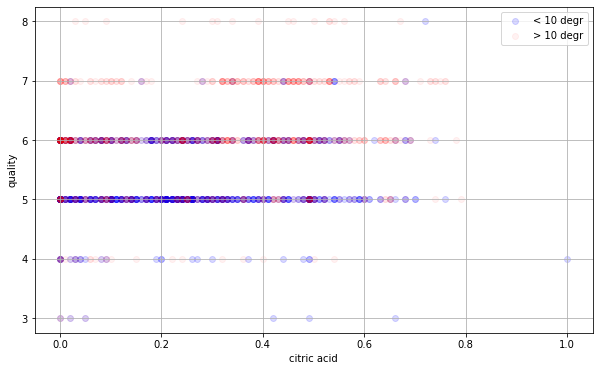

In [113]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['alcohol'] < 10]['citric acid'],
            data[data['alcohol'] < 10]['quality'],
            alpha = 0.15,
            label = '< 10 degr',
            color = 'b')

plt.scatter(data[data['alcohol'] > 10]['citric acid'],
            data[data['alcohol'] > 10]['quality'],
            alpha = 0.05,
            label = '> 10 degr',
            color = 'r')

plt.xlabel('citric acid')
# plt.xticks(range(18))
# plt.xlim(0, 17)
plt.ylabel('quality')
plt.legend()
plt.grid()

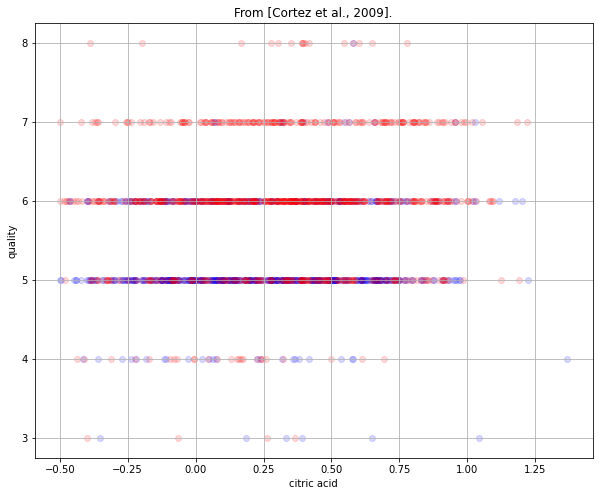

In [114]:
np.random.seed(0)
education_num_rnd = data['citric acid'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['alcohol'] < 10],
            data[data['alcohol'] < 10]['quality'],
            alpha = 0.15,
            label = '< 10 degr',
            color = 'b')

plt.scatter(education_num_rnd[data['alcohol'] > 10],
            data[data['alcohol'] > 10]['quality'],
            alpha = 0.15,
            label = '> 10 degr',
            color = 'r')

plt.xlabel('citric acid')
# plt.xticks(range(17))
# plt.xlim(0, 17)
plt.ylabel('quality')
plt.title('From [Cortez et al., 2009].')
plt.grid()

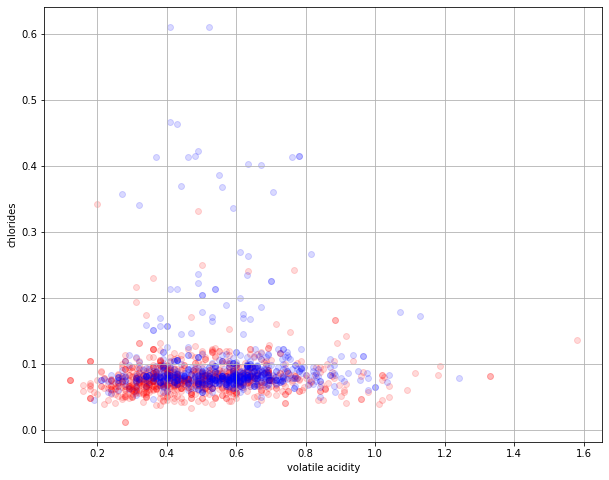

In [115]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['alcohol'] > 10]['volatile acidity'],
            data[data['alcohol'] > 10]['chlorides'],
            alpha = 0.15,
            label = '> 10 degr',
            color = 'r')

plt.scatter(data[data['alcohol'] < 10]['volatile acidity'],
            data[data['alcohol'] < 10]['chlorides'],
            alpha = 0.15,
            label = '< 10 degr',
            color = 'b')

plt.xlabel('volatile acidity')
plt.ylabel('chlorides')
plt.grid()

# Подготовка данных

In [116]:
data['alcohol'].dtype.name

'float64'

In [117]:
data['quality'].dtype.name

'int64'

In [118]:
categorical_columns = [col for col in data.columns if data[col].dtype.name == 'object']
numerical_columns   = [col for col in data.columns if data[col].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Обрабатываем пропущенные значения

In [119]:
data[numerical_columns].count(axis = 0)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

Пропущенные значения отсутствуют. Посмотрим среднее по столбцам

In [120]:
data.median(axis = 0)

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [121]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [122]:
data[numerical_columns].count(axis = 0)

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [123]:
data[categorical_columns].count(axis = 0)

Series([], dtype: int64)

In [124]:
data['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [125]:
type(data['fixed acidity'].describe())

pandas.core.series.Series

In [126]:
data['quality'].describe().rank(na_option='top')

count    8.0
mean     4.0
std      1.0
min      2.0
25%      3.0
50%      5.5
75%      5.5
max      7.0
Name: quality, dtype: float64

In [127]:
data['fixed acidity '] = data['fixed acidity'].fillna(4.0)

## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [128]:
data_numerical = data[numerical_columns]
data_numerical = data_numerical.drop(('quality'), axis = 1)
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [129]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [130]:
data_numerical.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00


## Соединяем все в одну таблицу

In [131]:
# data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
data = pd.concat((data_numerical,data['quality']), axis = 1 )
print(data.shape)
#print data.columns

(1599, 12)


In [132]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,5.636023
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.807569
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,3.000000
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,5.000000
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,6.000000
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,6.000000
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,8.000000


## Разбиение на обучающую и тестовую выборки
## X и y

Выбрасываем столбец 'quality', его мы будем предсказывать 

In [133]:
X = data.drop(('quality'), axis = 1)
y = data['quality']
feature_names = X.columns

In [134]:
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [135]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1599, 11)
(1599,)


Получаем обучающие и тестовые выборки

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1119 480


## $k$NN

Объявляем классификатор с параметром k = 10. Проводим обучение модели на обучающей выборке X_train, y_train:


In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Применяем метод predict. Считаем среднюю ошибку

In [138]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.3485254691689008 0.42916666666666664


In [139]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [140]:
err_test

0.4291666666666667

С помощью метода confusion matrix можно вычислить точность работы классификатора. Элемент матрицы (i, j) равен числу объектов из группы i, а предсказанных в группу j

In [141]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[  0   0   0   1   0   0]
 [  0   0   9   7   1   0]
 [  0   0 136  55   4   0]
 [  0   0  73 116  11   0]
 [  0   0   3  36  22   0]
 [  0   0   1   2   3   0]]


In [142]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

In [143]:
import warnings
warnings.filterwarnings('ignore')

## Подбор параметров

In [144]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 5, 10, 15, 20, 25, 35, 45, 50]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, iid=True, cv=8)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.3815907059874888 1


In [145]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.375


### PCA

Используем PCA для сокращения размерности пространства признаков. Сокращаем размерность признаков до 2 и изображаем на плоскости

In [146]:
from sklearn.decomposition import PCA

In [147]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train)
principalComponents

array([[ 0.16469508,  1.02110774,  3.61696585, -0.0500451 , -0.82399509],
       [ 3.64170852, -1.47688722, -0.86129041, -0.1404944 , -0.77521896],
       [-0.54881823,  0.10858175,  0.69421794,  0.16026727,  0.31351574],
       ...,
       [-1.45380961,  1.45445452, -0.51580377, -0.28945999,  0.02195739],
       [-0.07172077, -2.74058199,  1.45635091,  0.07403503, -0.25155309],
       [-2.27656227, -3.57227536,  1.84626999, -0.21382849,  0.19084945]])

In [148]:
pca = PCA(n_components = 2)
pcaDuo = pca.fit_transform(X)
pcaDuo 

array([[-1.61902338,  0.45080906],
       [-0.79892   ,  1.85597243],
       [-0.74824501,  0.88176301],
       ...,
       [-1.45567358,  0.3116481 ],
       [-2.26980784,  0.97948469],
       [-0.42684122, -0.53652236]])

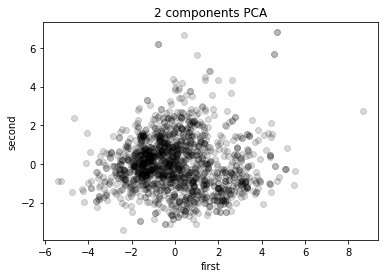

In [149]:
plt.scatter(pcaDuo[:,0], pcaDuo[:,1], color = 'black', alpha = .15)

plt.xlabel('first')
plt.ylabel('second')
plt.title('2 components PCA')
pass

#### Применяем kNN (в нашем случае оптимальное значение соседей было равно 1)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pcaDuo, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)


1119 480


In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.49583333333333335


#### График зависимости от главных компонент

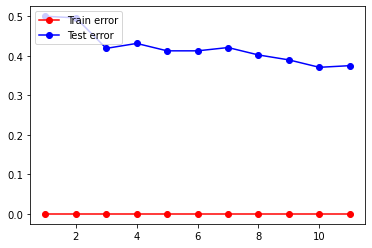

In [152]:
comp = range(1, 12, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    pcaFit = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pcaFit, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'r-o', label = 'Train error')
plt.plot(comp, err_test_mas,  'b-o', label = 'Test error')    
plt.legend(loc = 2)
pass

In [153]:
min_err = min(err_test_mas)
min_err_index = err_test_mas.index(min(err_test_mas))
print("Min err: " + str(min_err))
n_components_best = comp[min_err_index]
print("Best number of components: " + str(n_components_best))

Min err: 0.37083333333333335
Best number of components: 10


C увеличением количества главных компонент уменьшается ошибка. Наименьшая ошибка достигается при 10 компонентах. PCA не дает существенного выиграша по сравнению с KNN, однако ошибка уменьшилась

## Полносвязная нейронная сеть.

In [154]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 50),
              random_state=42, solver='lbfgs')

In [155]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.009830205540661306, Test error: 0.40625


In [156]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

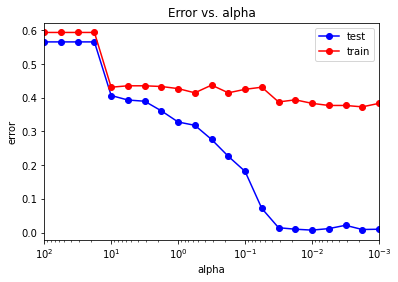

In [157]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [158]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = alpha_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Alpha: ', alpha_opt)

Min train error: 0.0071492403932082215, 	Min test error: 0.3729166666666667
Alpha:  0.0017782794100389228


In [159]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100, 50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.008936550491510277, Test error: 0.3729166666666667


In [160]:
neurons_arr = np.arange(10,150, 5)
test_err = []
train_err = []
for neuron in neurons_arr:
    mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron, 50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

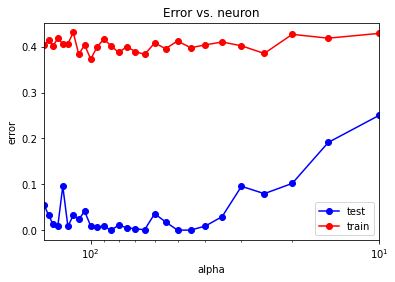

In [161]:
plt.semilogx(neurons_arr, train_err, 'b-o', label = 'test')
plt.semilogx(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neuron')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [162]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
neuron_opt = neurons_arr[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Neuron: ', neuron_opt)

Min train error: 0.0, 	Min test error: 0.3729166666666667
Neuron:  100


In [163]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt, 50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print('Train error: {}, Test error: {}'.format(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

Train error: 0.008936550491510277, Test error: 0.3729166666666667


# Random forests

In [164]:
from sklearn.ensemble import RandomForestClassifier

estiamtors = np.arange(500,1500, 100)
test_err = []
train_err = []
oob_score = []
for estimator in estiamtors:
    rf = RandomForestClassifier(n_estimators = estimator, random_state = 42, oob_score=True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_score.append(rf.oob_score_)

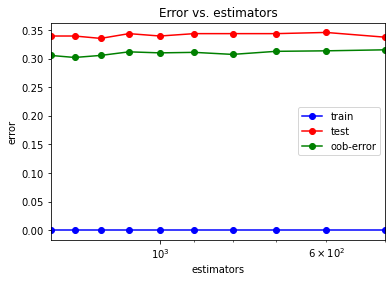

In [165]:
plt.semilogx(estiamtors, train_err, 'b-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'r-o', label = 'test')
plt.semilogx(estiamtors, np.ones(len(oob_score))-oob_score, 'g-o', label = 'oob-error')
plt.xlim([np.max(estiamtors), np.min(estiamtors)])
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [166]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
estimators_opt = estiamtors[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Estimators: ', estimators_opt)

Min train error: 0.0, 	Min test error: 0.33541666666666664
Estimators:  1200


# Gradient boosted trees

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

estiamtors = np.arange(900,1200, 100)
test_err = []
train_err = []
for estimator in estiamtors:
    gbt = GradientBoostingClassifier(n_estimators = estimator, random_state = 42)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

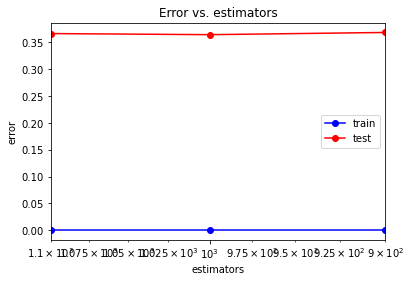

In [168]:
plt.semilogx(estiamtors, train_err, 'b-o', label = 'train')
plt.semilogx(estiamtors, test_err, 'r-o', label = 'test')
plt.xlim([np.max(estiamtors), np.min(estiamtors)])
plt.title('Error vs. estimators')
plt.xlabel('estimators')
plt.ylabel('error')
plt.legend()
pass

In [169]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
estimators_opt = estiamtors[test_err == min_test_err][0]

print('Min train error: {}, \tMin test error: {}'.format(min_train_err, min_test_err))
print('Estimators: ', estimators_opt)

Min train error: 0.0, 	Min test error: 0.3645833333333333
Estimators:  1000


# SVC

In [170]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.32529043789097406 0.39375


### Подбор параметров

In [171]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array}, cv = 3)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.38248436103663985 1.0


In [172]:
svc = SVC(gamma='auto', C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0 0.375


# Random Forest

In [173]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.3333333333333333


### Значимость признаков

In [174]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [175]:
np.sum(rf.feature_importances_)

1.0000000000000002

In [176]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'volatile acidity' (0.148991)
 2. feature 'citric acid' (0.136515)
 3. feature '   pH' (0.094338)
 4. feature 'chlorides' (0.090858)
 5. feature 'fixed acidity' (0.078562)
 6. feature 'total sulfur dioxide' (0.078252)
 7. feature 'density' (0.077919)
 8. feature 'residual sugar' (0.074726)
 9. feature 'sulphates' (0.074684)
10. feature 'alcohol' (0.073415)
11. feature 'free sulfur dioxide' (0.071741)


In [177]:
feature_names[[1,0,1]]

Index(['volatile acidity', 'fixed acidity', 'volatile acidity'], dtype='object')

(-1.0, 10.0)

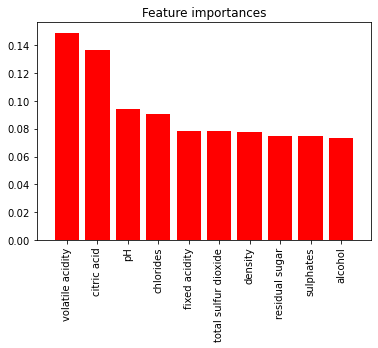

In [178]:
d_first = 10
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`alcohol`, `sulphates`, `volatile acidity`, `total sulfur dioxide`
существенно улучшает точность на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `alcohol`

# Extremely Randomized Trees

In [179]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.33541666666666664


# AdaBoost

In [180]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.45665773011617516 0.4791666666666667


## Выводы

- RandomForestClassifier 0.3333333333333333
- ExtraTreesClassifier 0.33541666666666664
- GradientBoostingClassifier 0.36666666666666664
- KNeighborsClassifier with PCA 0.37083333333333335
- KNeighborsClassifier 0.375
- SVC 0.375
- Neuronal network 0.37916666666666665
- AdaBoostClassifier 0.48333333333333334

Как можно заметить по результатам,наименьшего значения ошибки = 0.3333333333333333, получилось достичь при использовании RandomForestClassifier. PCA не дал существенного уменьшения ошибки, с полносвязной нейронной сеть ошибка лишь увеличилась.
Так как оценка производилась людьми, которые в свою очередь не смотрят на состав вина при оценивании его вкуса по 10 бальной шкале, отсюда такое значение ошибки. Если бы оценивание вина производилось только по составу, ошибка была бы меньше.